In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir("../")

In [3]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import util

# Analysis of answers for `edge_length_prompts`


## Load and clean the answers

In [4]:
answer_dir = os.path.join("answers", "longer_edge_length_prompts_steps")

In [5]:
answer_is_number = {}
answer_not_number = {}
number_r = re.compile(r"^\d*[.,]?\d*$")

for answer_file in sorted(os.listdir(answer_dir)):
    answer_file_path = os.path.join(answer_dir, answer_file)

    answer_str = open(answer_file_path, "r").read().strip().split("\n")[-1]
    answer_str = answer_str.split()

    found_digit = False
    for sub_str in answer_str:
        if number_r.match(sub_str):
            try:
                answer_is_number[answer_file] = float(sub_str)
                found_digit = True
            except: 
                found_digit = False
                break

    if not found_digit:
        answer_not_number[answer_file] = answer_str

print("Answer is a number:", len(answer_is_number))
print("Answer is not a number:", len(answer_not_number))

print(answer_not_number.keys())


Answer is a number: 45
Answer is not a number: 5
dict_keys(['grafo1683.11.txt', 'grafo1822.11.txt', 'grafo1912.11.txt', 'grafo1917.11.txt', 'grafo1920.11.txt'])


In [6]:
# we manually analyzed the answers that were harder to parse
answer_is_number["grafo1920.11.txt"] = 37.0

_ = answer_not_number.pop("grafo1920.11.txt")


Up to now we only checked if the returned string contained a number. We can now look for the presence of integers (expected) or floats.

In [7]:
answer_integer = {}
answer_float = {}
for answer_file, answer in answer_is_number.items():
    if answer.is_integer():
        answer_integer[answer_file] = int(answer)
    else:
        answer_float[answer_file] = answer

print("Answer is an Integer:", len(answer_integer))
print("Answer is a Float:", len(answer_float))

Answer is an Integer: 46
Answer is a Float: 0


18 15
16 16
17 18
17 18
17 17
14 17
33 30
26 24
19 19
12 16
24 24
20 18
12 8
31 24
17 17
18 21
34 22
25 23
20 18
16 16
11 11
20 18
18 12
42 37
17 17
28 29
23 24
25 24
13 13
25 23
21 23
18 18
22 20
17 18
15 15
35 35
18 17
19 19
20 18
20 15
39 36
25 20
18 18
17 17
22 25
30 20


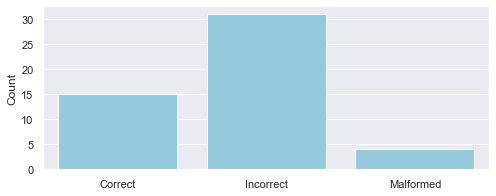

In [8]:
import ast

data = {}
data["Correct"] = 0
data["Incorrect"] = 0
data["Malformed"] = len(answer_not_number)

for f in util.read_files(base_path = "rome"):
    # print(f['filename'])
    fname = f['filename'].split("/")[1].replace(".graphml", ".txt")
    if fname not in answer_integer: continue

    query_file = open("queries/longer_edge_length_prompts_no_steps/" + f['filename'].split("/")[1].replace(".graphml", ".txt"), "r")
    query_content = query_file.read().split("\n")

    el = [(int(u), int(v)) for (u, v) in ast.literal_eval(query_content[4].split(":")[1].strip())]

    try:
        nr = {
            0 : [int(x) for x in ast.literal_eval(query_content[8].split(":")[1].strip())],
            1 : [int(x) for x in ast.literal_eval(query_content[9].split(":")[1].strip())],
            2 : [int(x) for x in ast.literal_eval(query_content[10].split(":")[1].strip())],
            3 : [int(x) for x in ast.literal_eval(query_content[11].split(":")[1].strip())],
            4 : [int(x) for x in ast.literal_eval(query_content[12].split(":")[1].strip())],
            5 : [int(x) for x in ast.literal_eval(query_content[13].split(":")[1].strip())],
        }
    except:
        nr = {
            0 : [int(x) for x in ast.literal_eval(query_content[8].split(":")[1].strip())],
            1 : [int(x) for x in ast.literal_eval(query_content[9].split(":")[1].strip())],
            2 : [int(x) for x in ast.literal_eval(query_content[10].split(":")[1].strip())],
            3 : [int(x) for x in ast.literal_eval(query_content[11].split(":")[1].strip())],
            4 : [int(x) for x in ast.literal_eval(query_content[12].split(":")[1].strip())],
        }

    if (util.count_edge_length(el, nr) == answer_integer[fname]):
        data["Correct"] += 1
    else: data["Incorrect"] += 1

    print(util.count_edge_length(el, nr), answer_integer[fname])

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert the dictionary to a Pandas DataFrame for plotting
df = pd.DataFrame.from_dict(data, orient='index', columns=['Value'])

sns.set(rc={'figure.figsize':(8,3)})

# Use Seaborn to create a bar chart
sns.barplot(x=df.index, y='Value', data=df, color='skyblue')

# Set the labels for the x and y axes
# plt.xSabel('Label')
plt.ylabel('Count')

# Show the plot
plt.show()